In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from PIL import Image

The following piece of code defines the iteration map 

$$\phi(z)=z-\frac{z^3-1}{3z^2}$$

of the Newton-Raphson method for the equation $z^3-1=0$. In addition, the three roots are specified, and a color for each of the roots is chosen.

In [5]:
#Newton-Raphson iteration for z**3-1=0
def phi(z):
    z=complex(z)
    return z+(1/(z*z)-z)/3
#cubic roots of 1
zz=[1,complex(-.5,.5*np.sqrt(3)),complex(-.5,-.5*np.sqrt(3))]
#corresponding colors
cc=[[1,0,0],[0,1,0],[0,0,1]]

We consider the rectangle $(x_{\textrm{min}},x_{\textrm{max}})\times(y_{\textrm{min}},y_{\textrm{max}})$ in the $z$-plane, and superimpose on it a grid of size $\texttt{imgx}\times\texttt{imgy}$. From each grid point, we start the Newton-Raphson iteration, and depending on the root it converges to, we color the point. Convergence is deemed to occur if the cuurent iterand is within $\varepsilon$ distance of a root. In case the iteration takes too long (i.e., $\texttt{iteration number} > \texttt{maxit}$), or division by zero occurs, we leave the point uncolored (black). We also shade the colors in such a way that darker regions correspond to points that need more iterations to converge to a root.

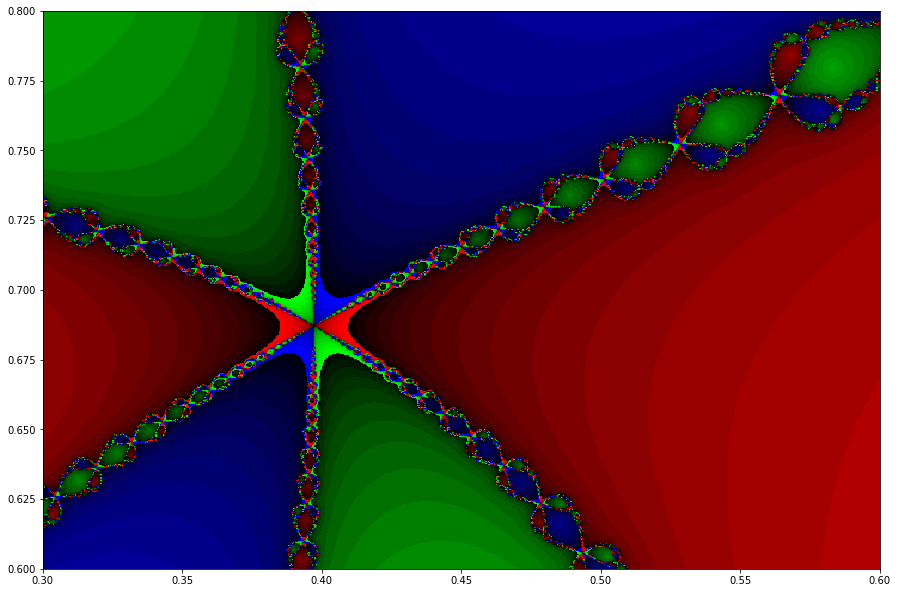

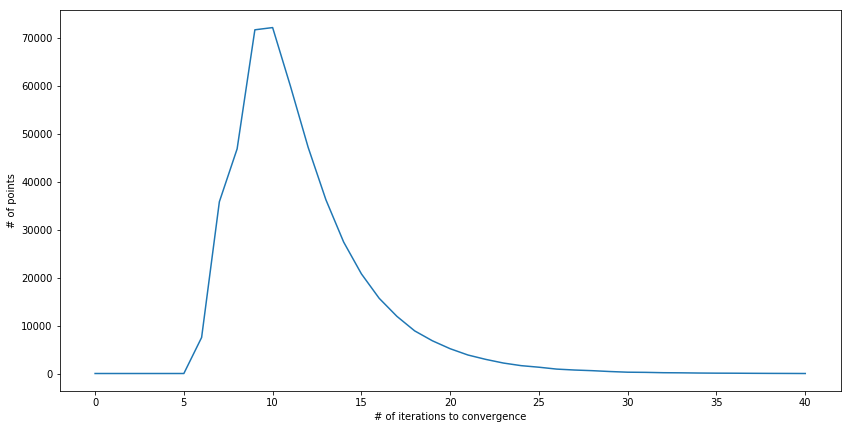

In [8]:
xmin = 0.3
xmax = 0.6
ymin = 0.6
ymax = 0.8
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=phi(z0)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[(maxit-k)*f*c for c in cc[l]] #I do not know why sit was used, but it caused a bug, therefore using maxit
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

There is a very large monochromatic region next to a root because the system is stable therefore if two starting points are close then they will converge rapidly to the root, as the newton-raphson methon is quadratic convergent.

This representation is a fractal as the same pattern, repeats itself, at different scales. Now in order to generate such behavior we need a function such that small intervals can be mapped to very large one. Then a tiny difference can lead a major change in the output value. In the case of the Newton-raphson approximation, we observe this behavior when the derivative of the function is close to being null, then we are dividing by a very small value leading to a major change. Now we thus can suppose that on the boundaries the derivative is almost null, leading then to a fractal.

In [20]:
#Newton-Raphson iteration for (z-5)(z-3i+2)(z+3i+2)(z+i)(z-i) = z^5 - z^4 - 6 z^3 - 66 z^2 - 7 z - 65
def phi(z):
    z=complex(z)
    return z-((z**5 - z**4 - 6*z**3 - 66*z**2 - 7*z - 65)/(-7 - 132*z - 18*z**2 - 4*z**3 + 5*z**4))
#roots of the above polynomial
zz=[5, complex(-2, -3), complex(-2, 3), complex(0,1), complex(0, -1)]
#corresponding colors
cc=[[1,0,0],[0,1,0],[0,0,1],[1,0,1],[0,1,1]]

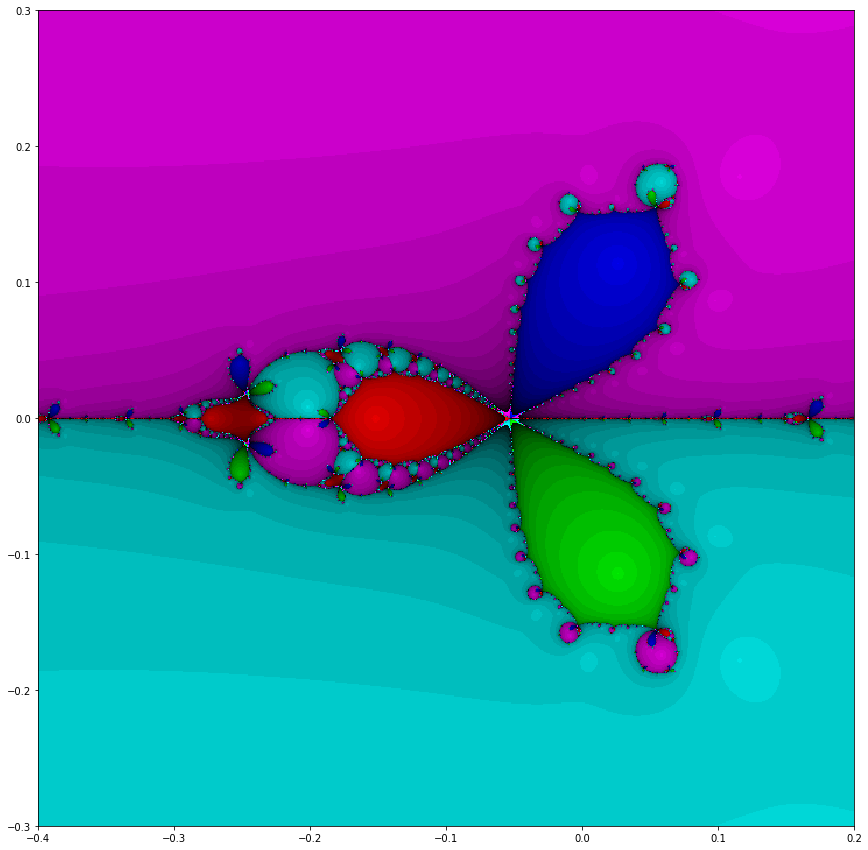

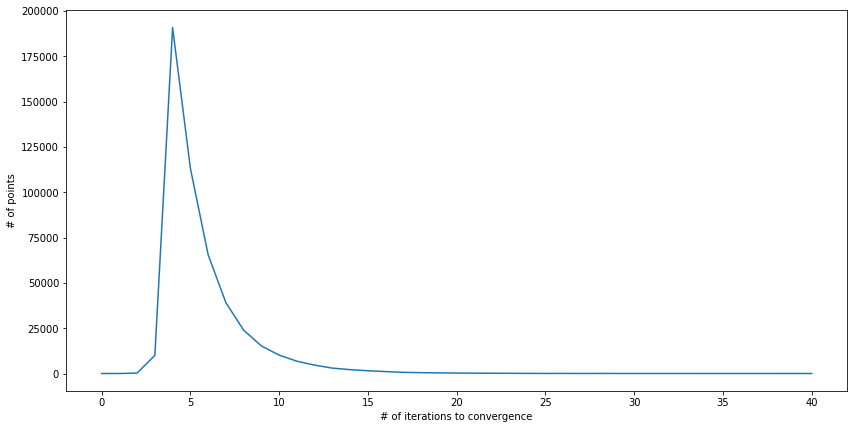

In [23]:
xmin = -0.4
xmax = 0.2
ymin = -0.3
ymax = 0.3
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=phi(z0)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[(maxit-k)*f*c for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

In [21]:
#Steffenson iteration for z**3-1=0
def phi(z, w):
    z=complex(z)
    f_z = z**3 - 1
    return z - w*f_z**2 / ((z + w*f_z)**3 - 1 - f_z)
#cubic roots of 1
zz=[1,complex(-.5,.5*np.sqrt(3)),complex(-.5,-.5*np.sqrt(3))]
#corresponding colors
cc=[[1,0,0],[0,1,0],[0,0,1]]

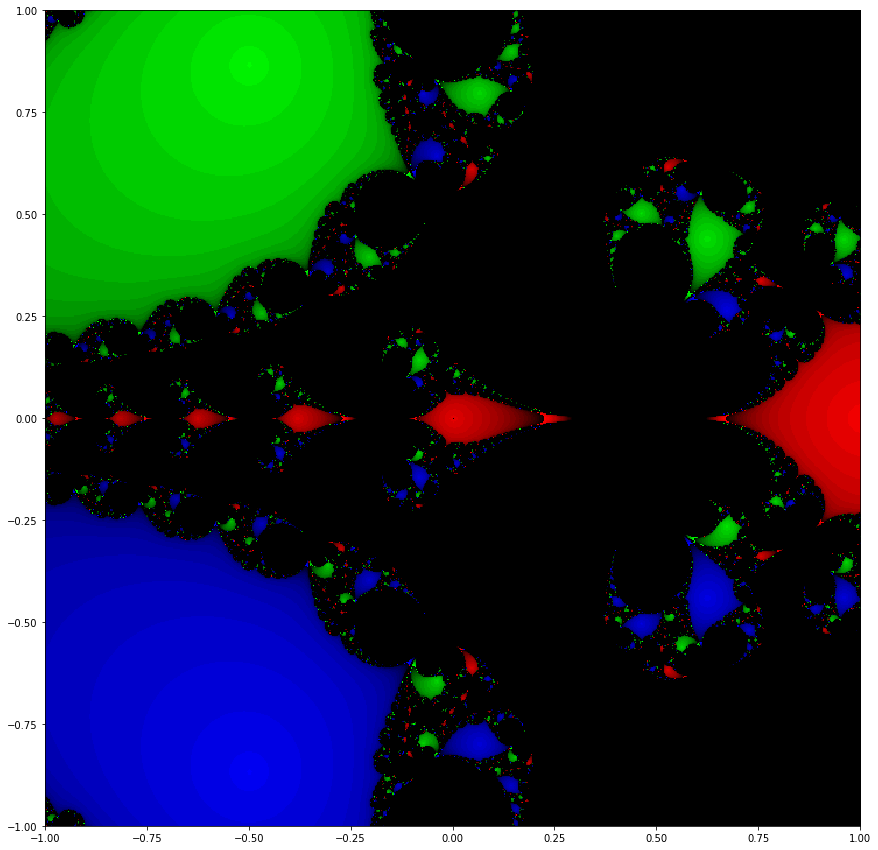

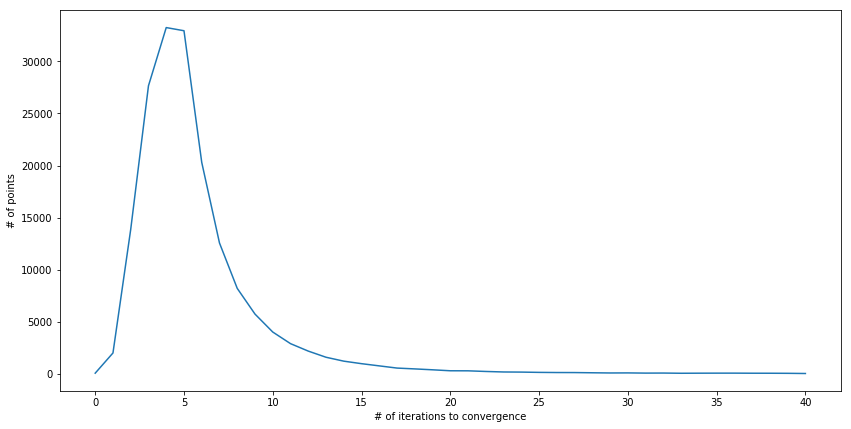

In [22]:
w = 1
xmin = -1
xmax = 1
ymin = -1
ymax = 1
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=phi(z0, w)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[(maxit-k)*f*c for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

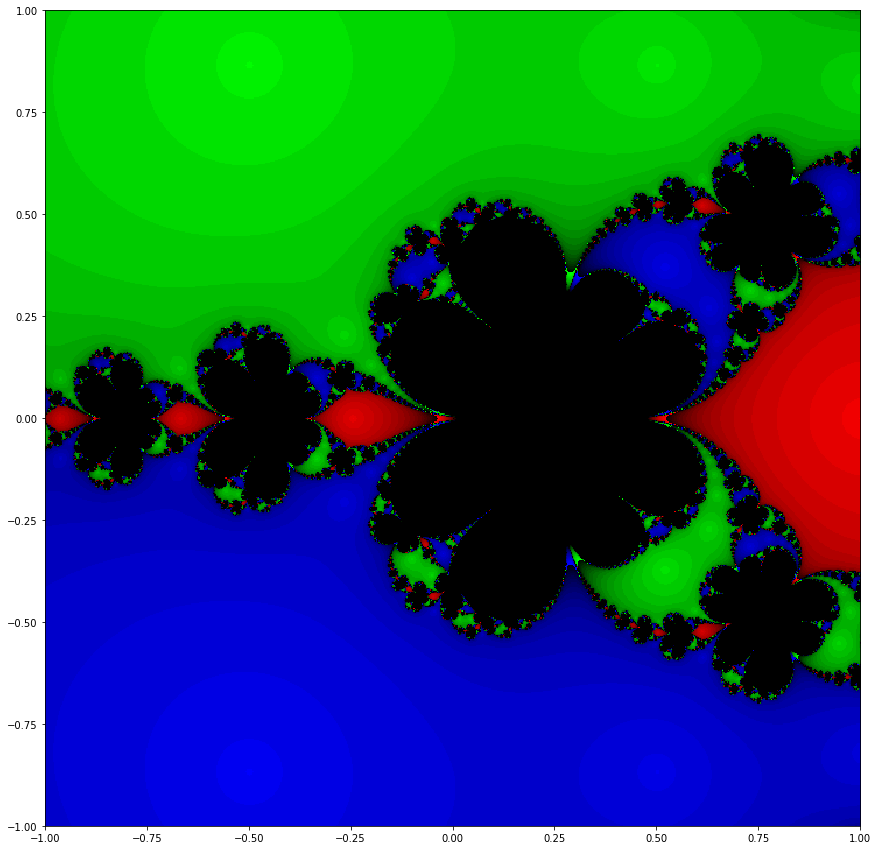

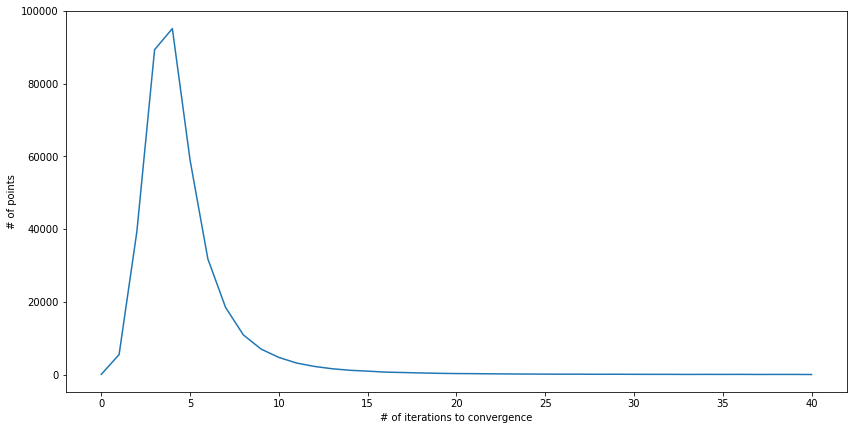

In [26]:
w = 0.5
xmin = -1
xmax = 1
ymin = -1
ymax = 1
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=phi(z0, w)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[(maxit-k)*f*c for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))

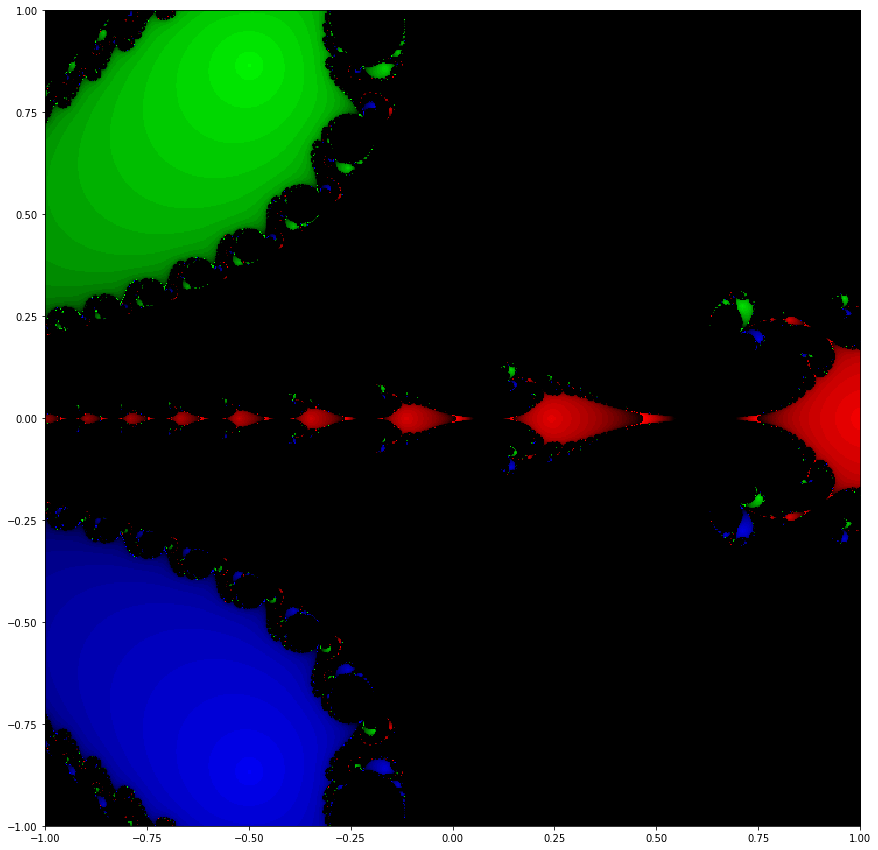

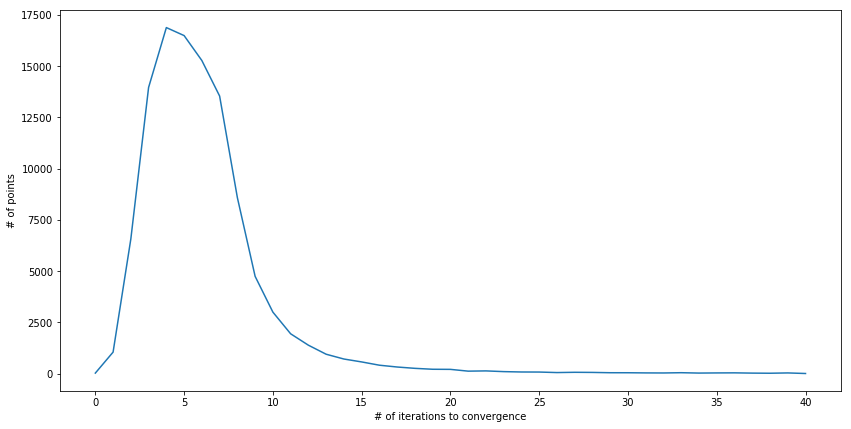

In [27]:
w = 1.5
xmin = -1
xmax = 1
ymin = -1
ymax = 1
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=phi(z0, w)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[(maxit-k)*f*c for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('newt.png', img)
plt.figure(figsize=(14,7))

It seems that the parameter $\omega$ changes the basin of attraction. Therefore the greater $\omega$ is, the faster do roots converge leading to a larger monochromatic area.

Now let's study the convergence of $\phi$, by studying it's derivative: 

$$
\phi'(z)=1- \frac{\omega f(z)}{f(z+\omega f(z))-f(z)} \Big( 2 - \frac{f(z) \big( f'(z+\omega f(z))(1+\omega f
'(z) \big)-f'(z)}{f(z+\omega f(z))-f(z)}   \Big)
$$


Now consider the taylor expansion of $\phi$: $\phi(x) = \phi(r) + (x-\alpha)\phi'(r) + \frac{1}{2}\phi''(\xi)(x-r)^2$


We need to show that $\phi'(r) = 0$, so that $|\phi(x)-\phi(r)| \leq M|x - \alpha|^2 $ proving thus that the Steffensen's iteration is quadratically convergent. 

But we know that if $r$ is a root the $f(r)= 0$ but also we know that $r$ is a fix point of $\phi$ leading to $\phi(r)=0$. Therefore we have that the Steffensen's iteration is quadratically convergent.